In [ ]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number

# Enable inline plotting
%matplotlib inline

%pylab inline 
# Must get this or you will get # NameError: name 'figsize' is not defined

import matplotlib.pylab
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(15, 5) 

print 'Python version ' + sys.version
print 'Pandas version ' + pd.__version__

# 增加sql 工具

In [ ]:
import pandas.io.sql
import psycopg2
conn = psycopg2.connect(user='lab')
cur = conn.cursor()


# 檢查連線 如果成功 就會print 0  失敗...

In [16]:
# conn.close()

In [ ]:
try:
    cur = conn.cursor()
    cur.execute('SELECT 1')
except psycopg2.OperationalError:
    pass

print conn.closed # 2

In [ ]:
# query db
sql = """

select * from ubike limit 3

"""

ubike_df = pandas.io.sql.read_sql(sql, conn)
ubike_df.head()  # try

In [19]:
ubike_df.columns

Index([u'when_ts', u'where_pt', u'code', u'name', u'area_name', u'space_num', u'avg_bike_num', u'max_bike_num', u'min_bike_num', u'bike_num_std', u'avg_space_num', u'max_space_num', u'min_space_num', u'space_num_std'], dtype='object')

In [34]:
ubike_df.dtypes

when_ts          datetime64[ns]
where_pt                 object
code                     object
name                     object
area_name                object
space_num                 int64
avg_bike_num            float64
max_bike_num              int64
min_bike_num              int64
bike_num_std            float64
avg_space_num           float64
max_space_num             int64
min_space_num             int64
space_num_std           float64
dtype: object

In [31]:
# query db
sql = """

select * from ubike 

"""

all = pandas.io.sql.read_sql(sql, conn)

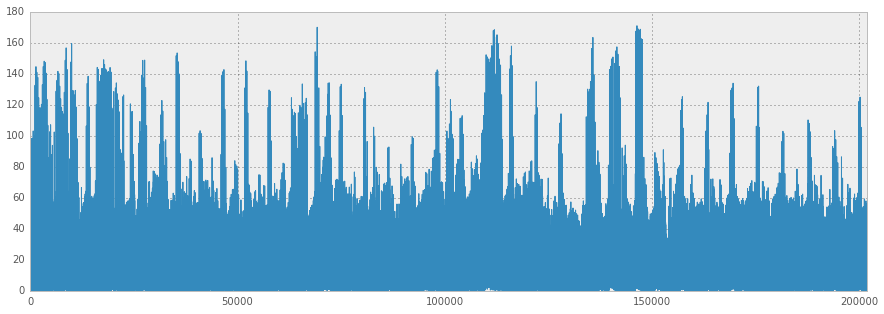

In [33]:
all['avg_bike_num'] .plot(legend=False)

# 欄位對照

when_ts          datetime64[ns]	u'日期', u'時間', 
where_pt                 object	u'經度', u'緯度', 
code                     object	u'場站代號', 
name                     object	u'場站名稱', 
area_name                object	u'場站區域', 
space_num                 int64	u'總停車格', 
avg_bike_num            float64	u'平均車輛數', 
max_bike_num              int64	u'最大車輛數', 
min_bike_num              int64	u'最小車輛數', 
bike_num_std            float64	u'車輛數標準差', 
avg_space_num           float64	u'平均空位數', 
max_space_num             int64	u'最大空位數', 
min_space_num             int64	u'最小空位數', 
space_num_std           float64	u'空位數標準差'


In [21]:
# query db
sql = """

select * from ubike where name = '饒河夜市' and (when_ts  BETWEEN '2014-12-08' AND '2014-12-09')
 order by when_ts; 

"""

df = pandas.io.sql.read_sql(sql, conn)
len(df)

10

In [22]:
df

,when_ts,where_pt,code,name,area_name,space_num,avg_bike_num,max_bike_num,min_bike_num,bike_num_std,avg_space_num,max_space_num,min_space_num,space_num_std
0,2014-12-08 15:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,38.667,39,38,0.516,20.333,21,20,1
1,2014-12-08 16:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,40.867,44,39,1.552,18.133,20,15,2
2,2014-12-08 17:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,44.000,48,41,1.633,15.000,18,11,2
3,2014-12-08 18:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,39.933,49,24,10.039,19.067,35,10,10
4,2014-12-08 19:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,26.400,29,24,1.805,32.600,35,30,2
5,2014-12-08 20:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,30.000,31,29,0.756,29.000,30,28,1
6,2014-12-08 21:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,32.667,34,30,1.175,26.333,29,25,1
7,2014-12-08 22:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,35.133,39,31,3.335,23.867,28,20,3
8,2014-12-08 23:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,35.000,39,31,3.094,24.000,28,20,3
9,2014-12-09 00:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,28.643,33,25,2.649,30.357,34,26,3


## 當然也可以使用 pandas 語法 or python 語法

In [23]:
df[:3]    # :3, :10, 5:10, 'name'

,when_ts,where_pt,code,name,area_name,space_num,avg_bike_num,max_bike_num,min_bike_num,bike_num_std,avg_space_num,max_space_num,min_space_num,space_num_std
0,2014-12-08 15:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,38.667,39,38,0.516,20.333,21,20,1
1,2014-12-08 16:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,40.867,44,39,1.552,18.133,20,15,2
2,2014-12-08 17:00:00,"(25.049845,121.571885)",15,饒河夜市,松山區,60,44.000,48,41,1.633,15.000,18,11,2


In [24]:
df[['when_ts','avg_bike_num']]

,when_ts,avg_bike_num
0,2014-12-08 15:00:00,38.667
1,2014-12-08 16:00:00,40.867
2,2014-12-08 17:00:00,44.000
3,2014-12-08 18:00:00,39.933
4,2014-12-08 19:00:00,26.400
5,2014-12-08 20:00:00,30.000
6,2014-12-08 21:00:00,32.667
7,2014-12-08 22:00:00,35.133
8,2014-12-08 23:00:00,35.000
9,2014-12-09 00:00:00,28.643


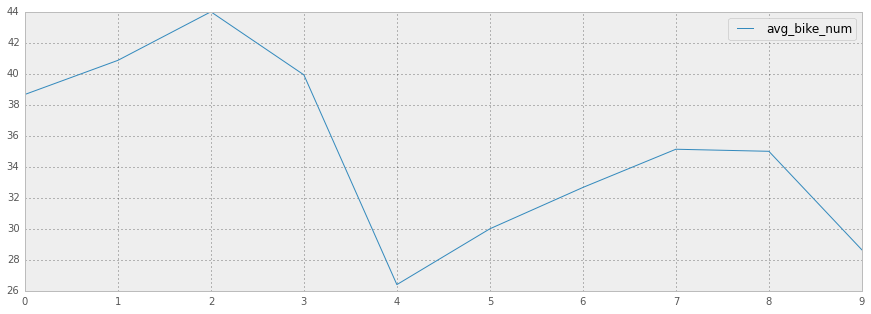

In [25]:
df[['when_ts','avg_bike_num']].plot()

## 調整字型

In [26]:
from matplotlib.font_manager import FontProperties, findfont

fp = FontProperties(family='monospace', 
                    style='normal',
                    variant='normal',
                    weight='normal',
                    stretch='normal',
                    size='medium')
                  
font = findfont(fp)

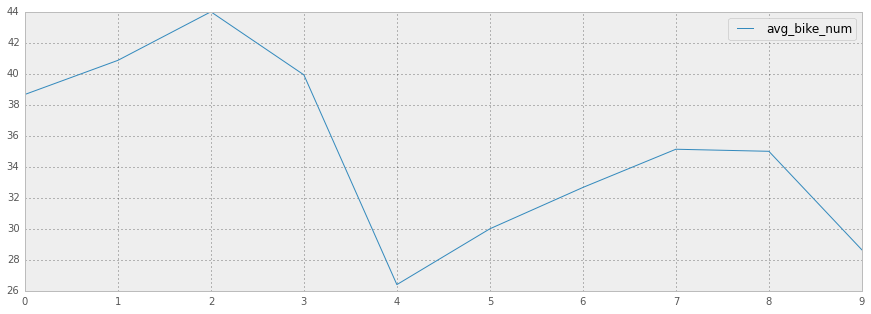

In [27]:
df[['when_ts','avg_bike_num']].plot()

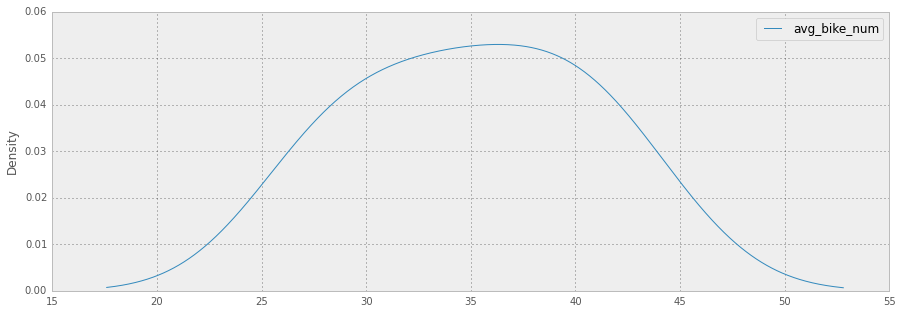

In [35]:
df[['when_ts','avg_bike_num']].plot(kind='kde')

## 比較兩區域

In [37]:
# query db
sql = """

select * from ubike where name = '社教館'and (when_ts  BETWEEN '2014-12-08' AND '2014-12-09')
 order by when_ts; 

"""

ponit2_df = pandas.io.sql.read_sql(sql, conn)
len(ponit2_df)

10

In [38]:
ponit2_df[:1]

,when_ts,where_pt,code,name,area_name,space_num,avg_bike_num,max_bike_num,min_bike_num,bike_num_std,avg_space_num,max_space_num,min_space_num,space_num_std
0,2014-12-08 15:00:00,"(25.048268,121.552278)",18,社教館,松山區,38,13.5,15,12,1.225,22.5,24,21,1


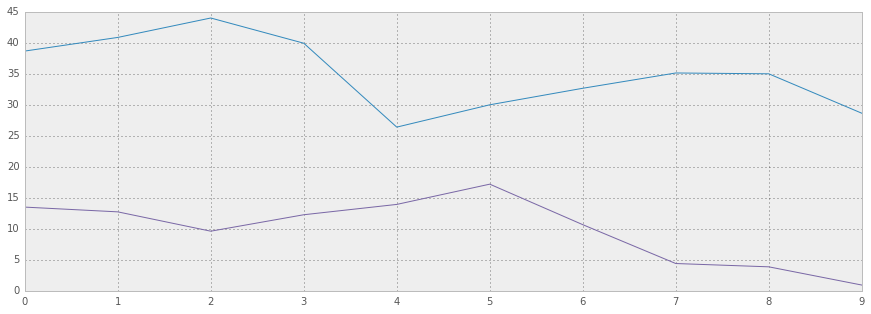

In [39]:
df['avg_bike_num'].plot()
ponit2_df['avg_bike_num'].plot()

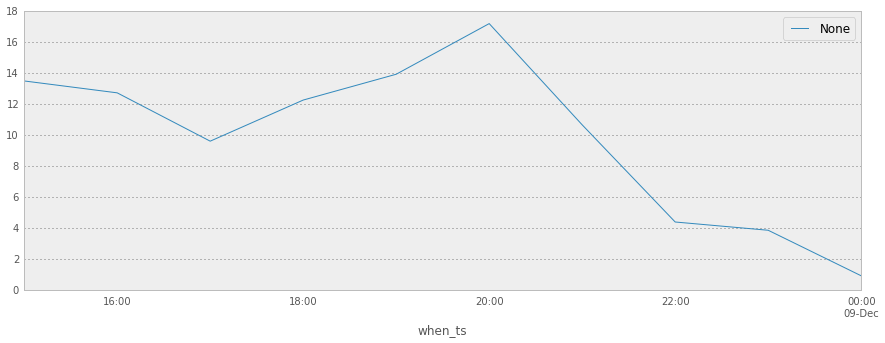

In [40]:
ponit2_df.plot(x='when_ts', y='avg_bike_num')

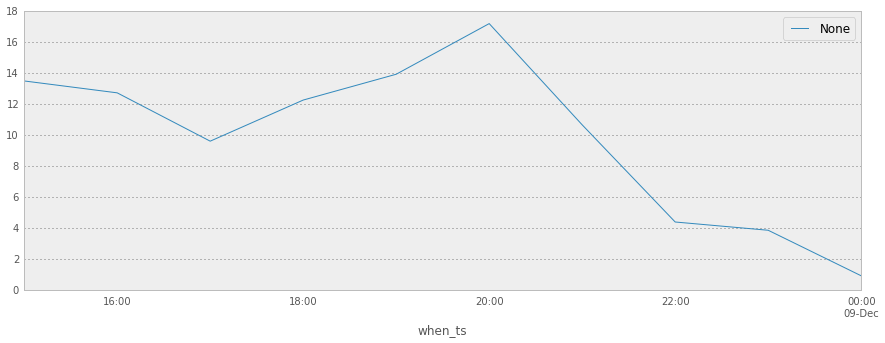

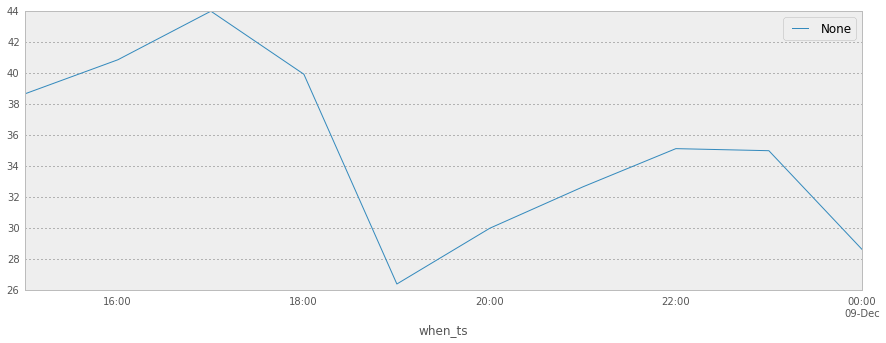

In [41]:
ponit2_df.plot(x='when_ts', y='avg_bike_num');
df.plot(x='when_ts', y='avg_bike_num')

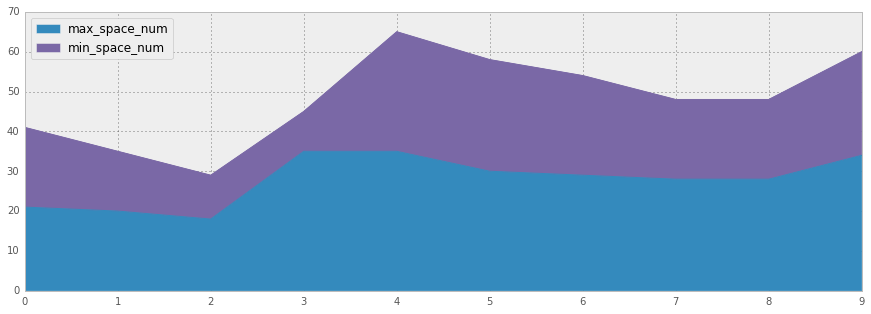

In [42]:
df[['max_space_num','min_space_num']].plot(kind='area');

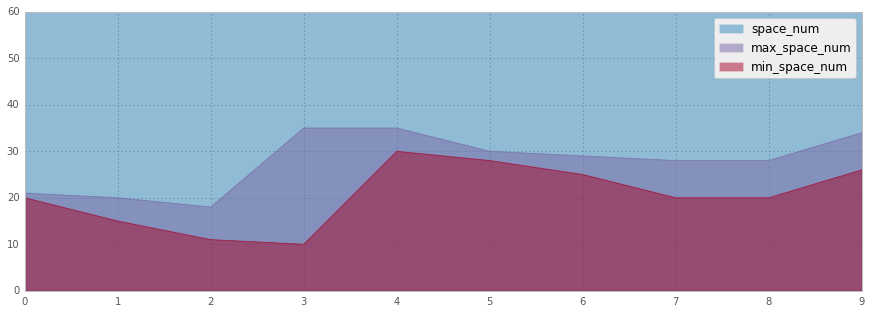

In [43]:
df[['space_num','max_space_num','min_space_num']].plot(kind='area', stacked=False);

## 增加 Table

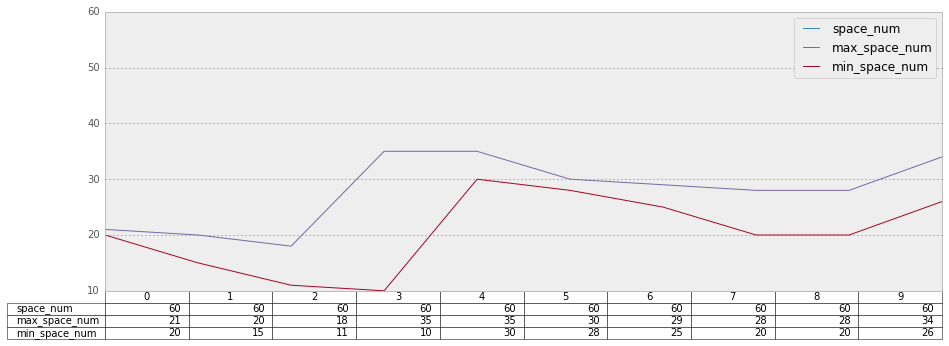

In [44]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
df[['space_num','max_space_num','min_space_num']].plot(table=True, ax=ax)

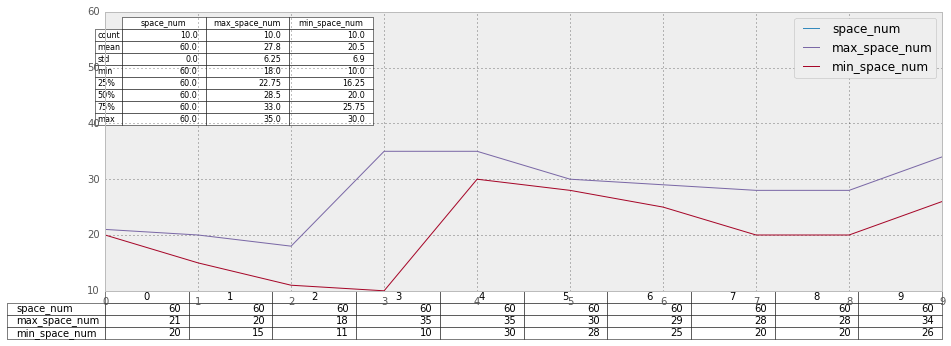

In [46]:
from pandas.tools.plotting import table
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df[['space_num','max_space_num','min_space_num']].describe(), 2),
      loc='upper left', colWidths=[0.1, 0.1, 0.1])
df[['space_num','max_space_num','min_space_num']].plot(table=True, ax=ax)

# try upper left colWidths=[0.1, 0.1, 0.1] table=True   table... remove

## 如何和併成一張表呢？ 利用sql

In [124]:
# query db
sql = """


select a.when_ts as time , 
       a.avg_bike_num as point_A, 
       b.avg_bike_num as point_B
from ubike a
inner join ubike b on 
a.when_ts = b.when_ts 
and (a.when_ts  BETWEEN '2014-12-08' AND '2014-12-09') 
and (a.name = '社教館' and b.name = '饒河夜市');


"""

PointJoin = pandas.io.sql.read_sql(sql, conn)
len(PointJoin)

10

In [126]:
PointJoin

,time,point_a,point_b
0,2014-12-08 15:00:00,13.500,38.667
1,2014-12-08 16:00:00,12.733,40.867
2,2014-12-08 17:00:00,9.615,44.000
3,2014-12-08 18:00:00,12.267,39.933
4,2014-12-08 19:00:00,13.933,26.400
5,2014-12-08 20:00:00,17.200,30.000
6,2014-12-08 21:00:00,10.667,32.667
7,2014-12-08 22:00:00,4.400,35.133
8,2014-12-08 23:00:00,3.867,35.000
9,2014-12-09 00:00:00,0.929,28.643


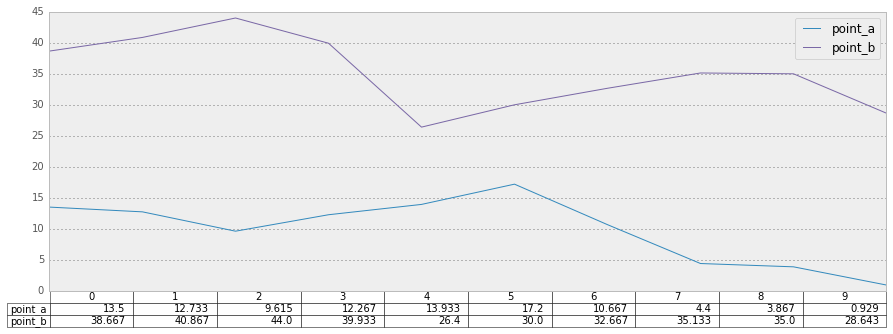

In [127]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
PointJoin[['point_a','point_b']].plot(table=True, ax=ax)

## Bar  圖形

In [ ]:
## Now you try 『loc='upper left'』『colWidths=[0.1, 0.1, 0.1] 』 『remove table=True』

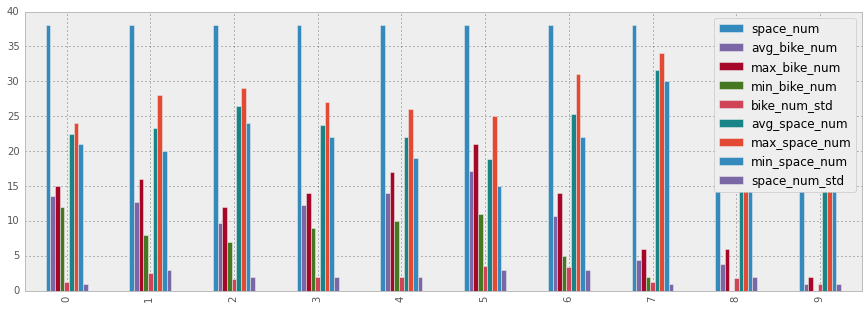

In [23]:
ponit2_df.plot(kind='bar');

## 這明顯不是我們要的 該如何做？

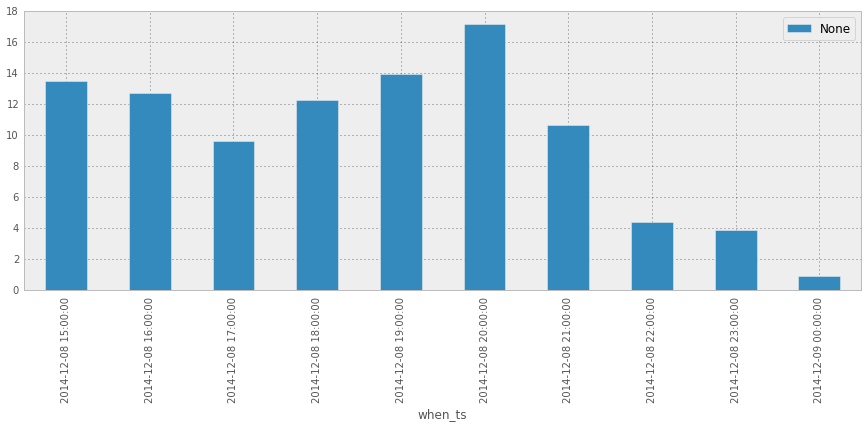

In [25]:
ponit2_df.plot(kind='bar',x='when_ts', y='avg_bike_num');

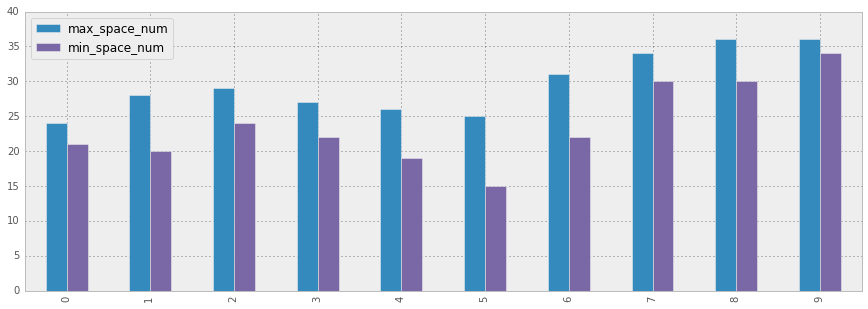

In [26]:
ponit2_df[['max_space_num','min_space_num']].plot(kind='bar');

## 堆疊圖並且 半透明 看起來才會好看

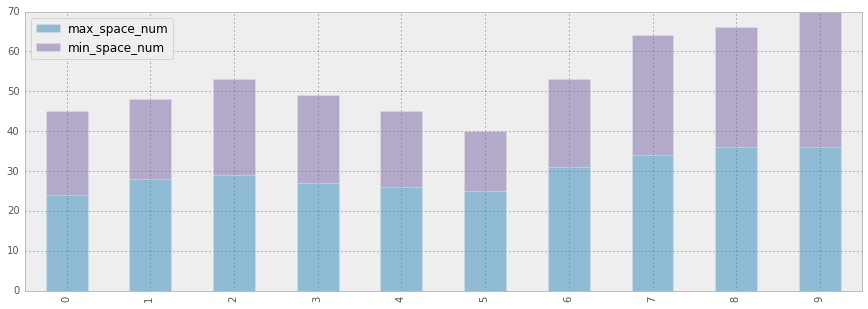

In [27]:
ponit2_df[['max_space_num','min_space_num']].plot(kind='bar',alpha=0.5,stacked=True);

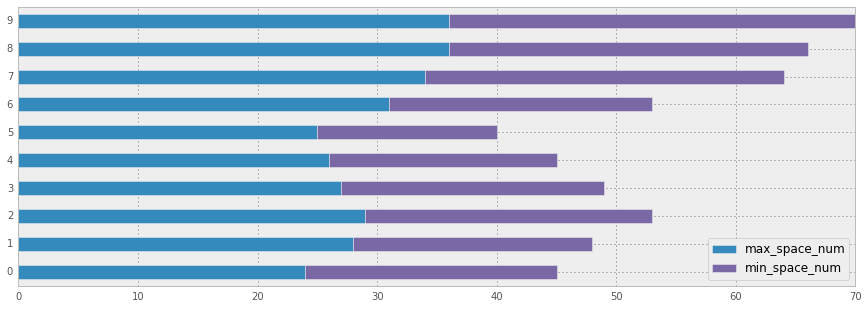

In [28]:
ponit2_df[['max_space_num','min_space_num']].plot(kind='barh', stacked=True);

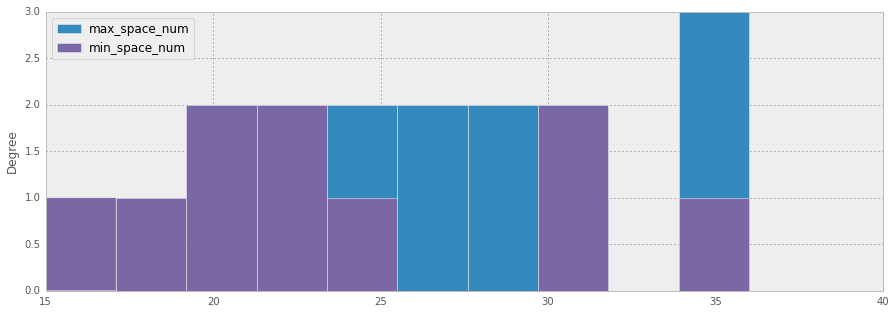

In [29]:
ponit2_df[['max_space_num','min_space_num']].plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba9da71d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fba9daece90>]], dtype=object)

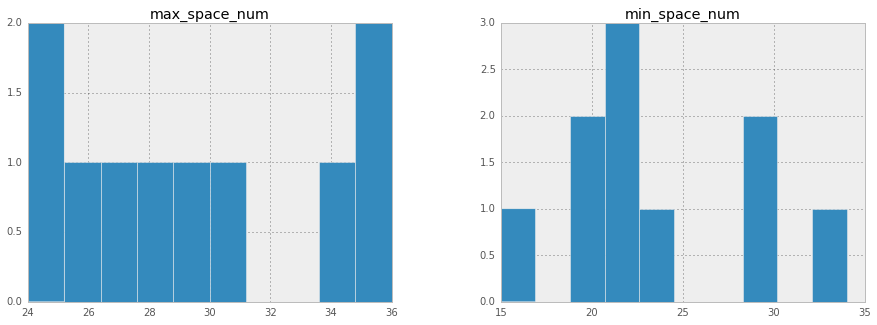

In [30]:
ponit2_df[['max_space_num','min_space_num']].hist()

In [31]:
ponit2_df[:1]

,when_ts,where_pt,code,name,area_name,space_num,avg_bike_num,max_bike_num,min_bike_num,bike_num_std,avg_space_num,max_space_num,min_space_num,space_num_std
0,2014-12-08 15:00:00,"(25.048268,121.552278)",18,社教館,松山區,38,13.5,15,12,1.225,22.5,24,21,1


## 休息！～ 接下來雨量與 車輛關係？溫度與車輛關係？
## 一個月份量

In [32]:
# query db
sql = """

select name  from ubike where area_name  like '%士林%' group by name

"""

pointA = pandas.io.sql.read_sql(sql, conn)
len(pointA)

14

In [33]:
pointA

,name
0,士林運動中心
1,福林公園
2,捷運芝山站(2號出口)
3,社子國小
4,天母運動公園
5,捷運劍潭站(2號出口)
6,中正基河路口
7,延平國宅
8,蘭雅公園
9,葫蘆國小


In [90]:
# query db
sql = """

select *  from ubike where name  = '天母運動公園' and (when_ts  BETWEEN '2014-12-25' AND '2014-12-31')

"""

pointA = pandas.io.sql.read_sql(sql, conn)
len(pointA)

145

In [35]:
pointA[:1]

,when_ts,where_pt,code,name,area_name,space_num,avg_bike_num,max_bike_num,min_bike_num,bike_num_std,avg_space_num,max_space_num,min_space_num,space_num_std
0,2014-12-08 15:00:00,"(25.116325,121.534136)",123,天母運動公園,士林區,44,31,33,29,1.789,11.833,14,9,2


In [91]:
# query db
sql = """

select *  from tpweather where name = '三玉國小'  and (when_ts  BETWEEN '2014-12-25' AND '2014-12-31');

"""

weaterA = pandas.io.sql.read_sql(sql, conn)
len(weaterA)

145

In [37]:
weaterA[:1]

,when_ts,where_pt,name,temp,max_temp,min_temp,hum_pct,pressure,wind_speed,rainfall
0,2014-12-19,"(25.1180133,121.5373439)",三玉國小,17.3889,17.4,16.9,76,1022.38,2.7,0


## 發現資料比數不同 ？？？
##    使用sub select 篩選出時間一樣的資料

In [92]:
# query db
sql = """

select * from tpweather where when_ts in 
    (select when_ts 
      from ubike 
      where name  = '天母運動公園'  order by when_ts ) 

and name = '三玉國小' and (when_ts  BETWEEN '2014-12-25' AND '2014-12-31' ) order by when_ts

"""

weatherA = pandas.io.sql.read_sql(sql, conn)
len(weatherA)

145

In [93]:
len(pointA)

145

In [94]:
len(weatherA)

145

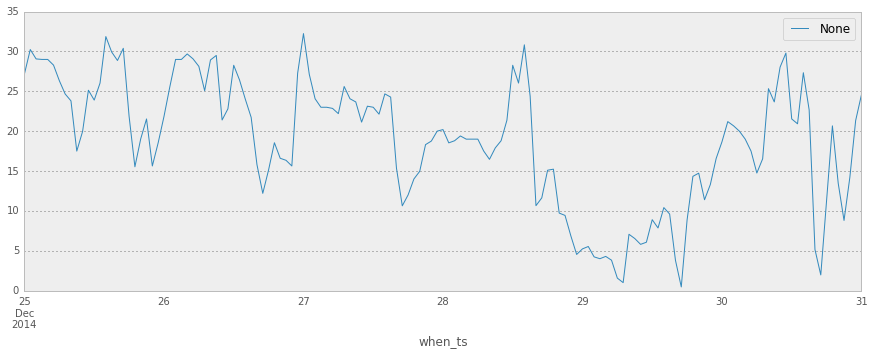

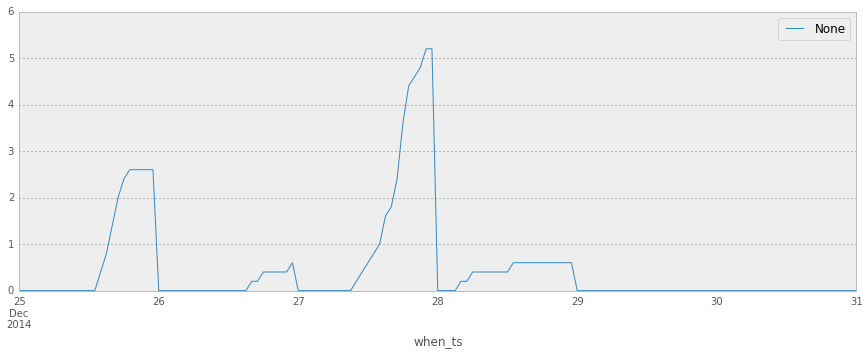

In [95]:
pointA.plot(x='when_ts', y='avg_bike_num')
weatherA.plot(x='when_ts', y='rainfall')

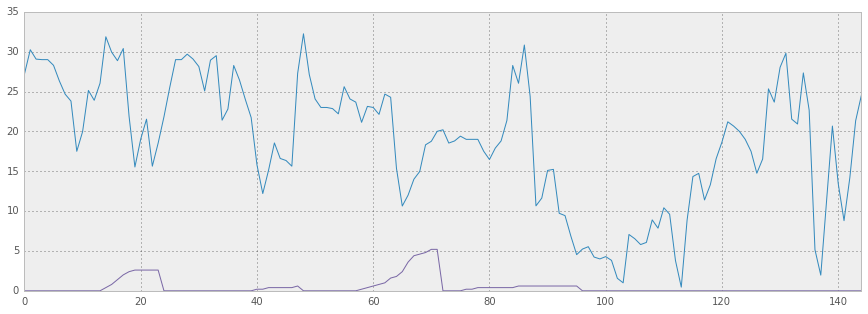

In [96]:
pointA['avg_bike_num'].plot()
weatherA['rainfall'].plot()

## 練習 利用  inner join 繪製上表，地點自選